In [16]:
# !pip uninstall tensorflow
# !pip install tensorflow
!pip install --upgrade tensorflow



Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 1.7 MB/s eta 0:03:57
   ---------------------------------------- 0.2/390.3 MB 2.3 MB/s eta 0:02:51
   ---------------------------------------- 0.5/390.3 MB 3.8 MB/s eta 0:01:44
   ---------------------------------------- 1.1/390.3 MB 6.0 MB/s eta 0:01:06
   ---------------------------------------- 2.4/390.3 MB 10.4 MB/s eta 0:00:38
   ---------------------------------------- 4.2/390.3 MB 15.8 MB/s eta 0:00:25
    --------------------------------------- 5.7/390.3 MB 17.5 MB/s eta 0:00:23
    --------------------------------------- 7.5/390.3 MB 19.9 MB/s eta 0:00:20
    --------------------------------------- 9.3/390.3 MB 21.9 MB/s eta 0:00:18
   - -------------------------------------- 11.0/390.3 MB 32.7 MB/s eta 0:00:12
   - -------------------------------------- 12.8/390.3 MB 36.3 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [20]:
# Load the prepared data
X = np.load('../data/12hrs/X_12hr.npy')
y = np.load('../data/12hrs/y_12hr.npy')


In [22]:
X.shape

(19489, 48, 52)

In [24]:
y.shape

(19489,)

In [26]:
count_ones = np.sum(y == 1)

count_zeros = np.sum(y == 0)

print(f"Number of 1s: {count_ones}")
print(f"Number of 0s: {count_zeros}")

Number of 1s: 7951
Number of 0s: 11538


In [28]:
X[0].shape

(48, 52)

In [30]:
X[0]

array([[-0.58757807, -0.83663026, -0.87412995, ..., -0.82377426,
        -0.84186686, -0.63521394],
       [-0.58757807, -0.83663026, -0.87412995, ..., -0.82377426,
        -0.84186686, -0.63521394],
       [-0.58757807, -0.83663026, -0.87412995, ..., -0.82377426,
        -0.84186686, -0.63521394],
       ...,
       [ 1.7019015 ,  1.29315507,  1.1122512 , ...,  0.99811556,
         1.0690281 ,  0.99275916],
       [ 1.7019015 ,  1.29315507,  1.1122512 , ...,  0.99811556,
         1.0690281 ,  1.26462889],
       [ 1.7019015 ,  1.29315507,  1.1122512 , ...,  1.85962935,
         1.0690281 ,  1.96022351]])

In [32]:
X[0][15]

array([-0.58757807, -0.83663026, -0.87412995, -0.82031106, -0.00669597,
       -0.00817735, -0.00252793, -0.04315573, -0.17805486, -0.13991747,
       -0.88200828, -0.87508743, -0.76989989, -0.87055823, -0.88142161,
       -0.78358441, -0.87038695, -0.88208305, -0.88220271, -0.86776175,
       -0.85036606, -0.86128536, -0.4234461 , -0.88080685, -0.8818527 ,
       -0.88166248, -0.88187548, -0.53180926, -0.88186461, -0.53819592,
       -0.87297825, -0.85484888, -0.87746256, -0.88193285, -0.88186433,
       -0.74685734, -0.87974692, -0.87776348, -0.8809766 , -0.880365  ,
       -0.87704713, -0.48722752, -0.83359775, -0.88140188, -0.02658927,
       -0.0189149 , -0.88125807, -0.83948636, -0.87836265, -0.82377426,
       -0.84186686, -0.63521394])

In [34]:
unique_values, counts = np.unique(y, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f'Value {value} occurs {count} times')

Value 0 occurs 11538 times
Value 1 occurs 7951 times


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

# Define Transformer Encoder Layer
from tensorflow.keras.layers import MultiHeadAttention

from tensorflow.keras.layers import MultiHeadAttention, Dropout, Add, LayerNormalization, Dense

# def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.3):
#     # Multi-Head Self-Attention
#     attention_layer = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)
#     attention_output = attention_layer(inputs, inputs)  # Removed unpacking
#     attention_output = Dropout(dropout)(attention_output)
#     attention_output = Add()([attention_output, inputs])  # Residual connection
#     attention_output = LayerNormalization()(attention_output)

#     # Feed-Forward Network
#     ff_output = Dense(ff_dim, activation="relu")(attention_output)
#     ff_output = Dense(inputs.shape[-1])(ff_output)  # Match input dimension
#     ff_output = Dropout(dropout)(ff_output)
#     ff_output = Add()([ff_output, attention_output])  # Residual connection
#     output = LayerNormalization()(ff_output)

#     return output

# from tensorflow.keras.layers import MultiHeadAttention

from tensorflow.keras.layers import MultiHeadAttention

def transformer_encoder_with_attention(inputs, head_size, num_heads, ff_dim, dropout=0.3):
    # Multi-Head Self-Attention
    attention_layer = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)
    attention_output = attention_layer(inputs, inputs)  # Attention outputs the attention values (no direct return_attention_scores)
    
    # Get attention scores
    attention_scores = attention_layer.get_attention_scores(inputs, inputs)  # Access attention scores
    
    # Apply dropout and residual connections
    attention_output = Dropout(dropout)(attention_output)
    attention_output = Add()([attention_output, inputs])  # Residual connection
    attention_output = LayerNormalization()(attention_output)

    # Feed-Forward Network
    ff_output = Dense(ff_dim, activation="relu")(attention_output)
    ff_output = Dense(inputs.shape[-1])(ff_output)  # Match input dimension
    ff_output = Dropout(dropout)(ff_output)
    ff_output = Add()([ff_output, attention_output])  # Residual connection
    output = LayerNormalization()(ff_output)

    return output, attention_scores



# Input shape: (48, 52) -> 48 time steps, 52 features
inputs = Input(shape=(48, 52))

# Transformer encoder layers with attention weights
x, attention_scores = transformer_encoder_with_attention(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)
x, attention_scores = transformer_encoder_with_attention(x, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)

# Global average pooling
x = GlobalAveragePooling1D()(x)

# Dense output layer for binary classification
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs, [outputs, attention_scores])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

AttributeError: 'MultiHeadAttention' object has no attribute 'get_attention_scores'

In [138]:
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.inspection import permutation_importance

# Define the model
def create_model():
    inputs = Input(shape=(48, 52))  # Example shape: 48 timesteps, 52 features
    x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)
    x = LSTM(64, activation='relu', return_sequences=True)(x)
    x = LSTM(32, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate and train the model
model = create_model()
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

# Now we can use permutation_importance with the model
def model_predict(X):
    return model.predict(X)

# Apply permutation importance
result = permutation_importance(model_predict, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)

# Get the importance of each feature
feature_importance = result.importances_mean

# Display the feature importance scores
for i, importance in enumerate(feature_importance):
    print(f"Feature {i}: Importance {importance}")


LookupError: gradient registry has no entry for: shap_AddV2

In [124]:
!pip show tensorflow shap


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\SAIFUL_BADHON\AppData\Roaming\Python\Python312\site-packages
Requires: tensorflow-intel
Required-by: tf_keras
---
Name: shap
Version: 0.46.0
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: C:\Users\SAIFUL_BADHON\AppData\Roaming\Python\Python312\site-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm
Required-by: 


In [122]:
import shap
import numpy as np

# Assume X_train contains your training data with shape [num_samples, 48, 52]

# Create the SHAP explainer using the trained Keras model
explainer = shap.DeepExplainer(model, X_train[:100])  # Using a subset of training data for faster computation

# Get SHAP values for the data (using 10 samples for explanation)
shap_values = explainer.shap_values(X_train[:10])  # Choose a small number of samples to explain

# Visualize the SHAP values for feature importance
shap.summary_plot(shap_values[0], X_train[:10], feature_names=[f"Feature {i+1}" for i in range(52)])


StagingError: in user code:

    File "C:\Users\SAIFUL_BADHON\AppData\Roaming\Python\Python312\site-packages\shap\explainers\_deep\deep_tf.py", line 269, in grad_graph  *
        x_grad = tape.gradient(out, shap_rAnD)

    LookupError: gradient registry has no entry for: shap_Neg


In [52]:

# Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Add Early Stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Save the model
# model.save('lstm_model_advanced.h5')



Epoch 1/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7100 - loss: 0.5809 - val_accuracy: 0.7820 - val_loss: 0.4759
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7861 - loss: 0.4721 - val_accuracy: 0.8265 - val_loss: 0.4054
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.8013 - loss: 0.4414 - val_accuracy: 0.8451 - val_loss: 0.3688
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8376 - loss: 0.3831 - val_accuracy: 0.8423 - val_loss: 0.3996
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8307 - loss: 0.3827 - val_accuracy: 0.8557 - val_loss: 0.3620
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8469 - loss: 0.3585 - val_accuracy: 0.8548 - val_loss: 0.3550
Epoch 7/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8480 - loss: 0.3539 - val_accuracy: 0.8509 - val_loss: 0.3506
Epoch 8/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8556 - loss: 0.3422 - val_acc

In [53]:
# Step 3: Evaluate the model
from sklearn.metrics import precision_score,recall_score,f1_score

y_pred = (model.predict(X_test) > 0.5).astype(int)

# Print precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
Precision: 0.88
Recall: 0.82
F1 Score: 0.85


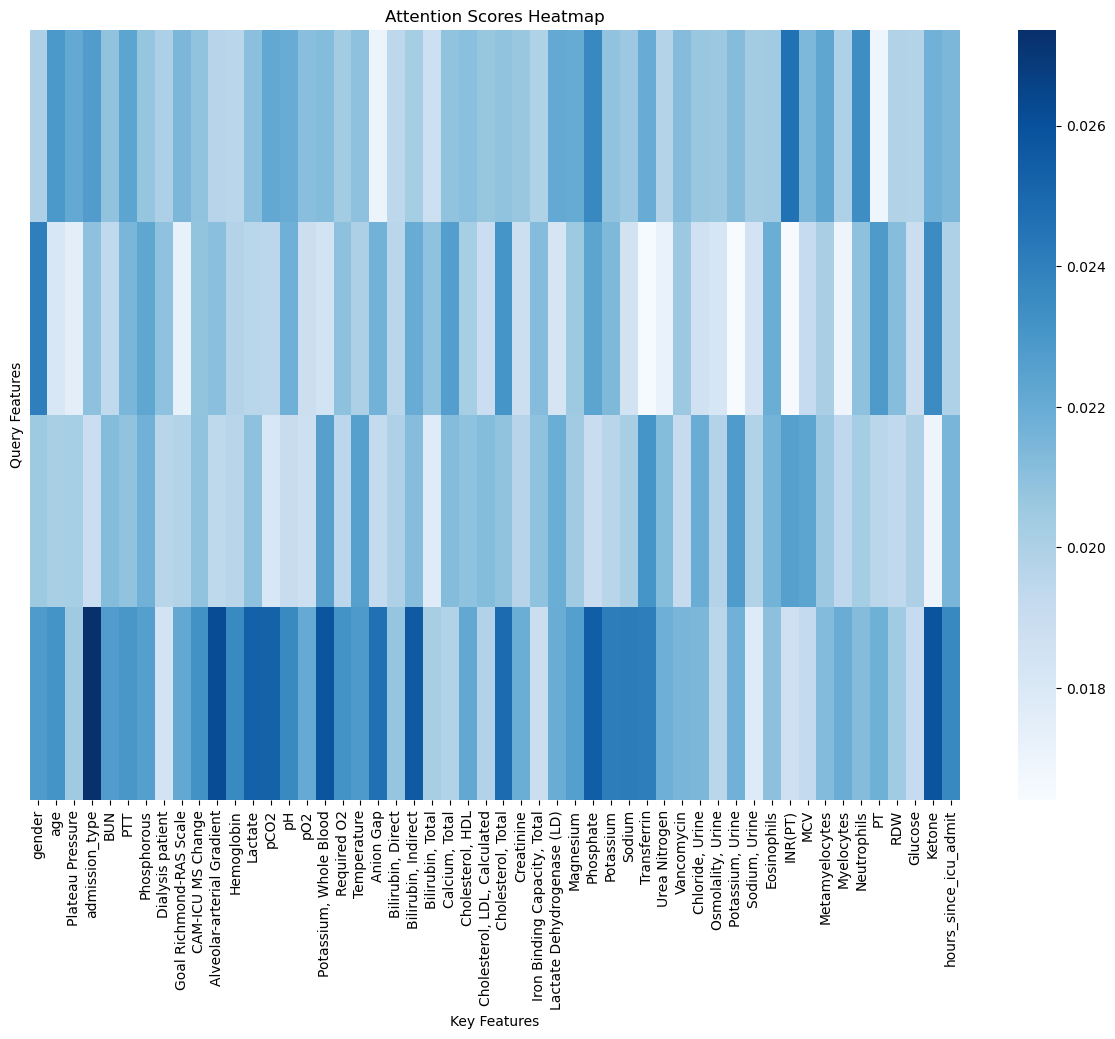

In [100]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
risk = ['gender', 'age', 'Plateau Pressure', 'admission_type', 'BUN', 'PTT', 'Phosphorous', 'Dialysis patient',
        'Goal Richmond-RAS Scale', 'CAM-ICU MS Change', 'Alveolar-arterial Gradient',
        'Hemoglobin', 'Lactate', 'pCO2', 'pH', 'pO2', 'Potassium, Whole Blood',
        'Required O2', 'Temperature', 'Anion Gap', 'Bilirubin, Direct', 'Bilirubin, Indirect',
        'Bilirubin, Total', 'Calcium, Total', 'Cholesterol, HDL', 'Cholesterol, LDL, Calculated',
        'Cholesterol, Total', 'Creatinine', 'Iron Binding Capacity, Total', 'Lactate Dehydrogenase (LD)',
        'Magnesium', 'Phosphate', 'Potassium', 'Sodium', 'Transferrin', 'Urea Nitrogen',
        'Vancomycin', 'Chloride, Urine', 'Osmolality, Urine', 'Potassium, Urine',
        'Sodium, Urine', 'Eosinophils', 'INR(PT)', 'MCV', 'Metamyelocytes', 'Myelocytes',
        'Neutrophils', 'PT', 'RDW', 'Glucose', 'Ketone', 'hours_since_icu_admit']

# Generate random input
sample_input = np.random.rand(1, 52, 52)

# Get attention layer and output
attention_layer = model.get_layer(name="multi_head_attention_9")  # Replace with correct attention layer name
attention_output = attention_layer(sample_input, sample_input, return_attention_scores=True)
attention_scores = attention_output[1]  # Extract attention scores

# Visualize attention scores (e.g., as a heatmap)
plt.figure(figsize=(15, 10))

# Use risk feature names for X-axis labels
sns.heatmap(attention_scores[0, :, :, 0], annot=False, cmap="Blues",
            xticklabels=risk, yticklabels=False)

plt.title("Attention Scores Heatmap")
plt.xlabel("Key Features")
plt.ylabel("Query Features")
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.show()


In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted list of features to match the number of 52 features in the model input
features = [f'feature_{i+1}' for i in range(52)]  # Example placeholders for 52 features

# Generate random input (1 sample with 48 time steps, 52 features)
sample_input = np.random.rand(1, 48, 52)

# Get attention layer and output
attention_layer = model.get_layer(name="multi_head_attention_9")  # Replace with the correct attention layer name
attention_output = attention_layer(sample_input, sample_input, return_attention_scores=True)
attention_scores = attention_output[1]  # Extract attention scores

# Check the shape of the attention scores
print("Shape of attention scores:", attention_scores.shape)

# Assuming the shape of attention_scores is (batch_size, num_queries, num_keys, num_heads)
# Here, batch_size=1, num_queries=48 (time steps), num_keys=52 (features), num_heads is the number of attention heads

# Compute the mean attention score for each feature (averaging over time steps and attention heads)
attention_means = np.mean(attention_scores[0], axis=(0, 1))  # Averaging over the query (time) and key (feature) axes

# Create a dictionary of feature names and their corresponding attention scores
feature_attention_dict = {features[i]: attention_means[i] for i in range(len(features))}

# Sort the dictionary based on attention scores in descending order
sorted_features = sorted(feature_attention_dict.items(), key=lambda x: x[1], reverse=True)

# Print the ranked features with their attention scores
for rank, (feature, score) in enumerate(sorted_features, 1):
    print(f"Rank {rank}: {feature} with attention score {score:.4f}")

# Visualize attention scores as a heatmap (using all 52 features)
plt.figure(figsize=(15, 10))

# Use feature names for X-axis labels
sns.heatmap(attention_scores[0, :, :, 0], annot=False, cmap="Blues",
            xticklabels=features, yticklabels=False)

plt.title("Attention Scores Heatmap")
plt.xlabel("Features")
plt.ylabel("Query Features")
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.show()


Shape of attention scores: (1, 4, 48, 48)


IndexError: index 48 is out of bounds for axis 0 with size 48

Rank 1: INR(PT) with attention score 0.0242
Rank 2: CAM-ICU MS Change with attention score 0.0234
Rank 3: gender with attention score 0.0225
Rank 4: Cholesterol, Total with attention score 0.0224
Rank 5: Alveolar-arterial Gradient with attention score 0.0221
Rank 6: pO2 with attention score 0.0218
Rank 7: PT with attention score 0.0215
Rank 8: Cholesterol, HDL with attention score 0.0215
Rank 9: Plateau Pressure with attention score 0.0213
Rank 10: Sodium, Urine with attention score 0.0212
Rank 11: Iron Binding Capacity, Total with attention score 0.0209
Rank 12: Goal Richmond-RAS Scale with attention score 0.0208
Rank 13: Creatinine with attention score 0.0208
Rank 14: Potassium, Whole Blood with attention score 0.0205
Rank 15: pCO2 with attention score 0.0203
Rank 16: Bilirubin, Indirect with attention score 0.0202
Rank 17: Temperature with attention score 0.0199
Rank 18: admission_type with attention score 0.0197
Rank 19: MCV with attention score 0.0196
Rank 20: Vancomycin with atte

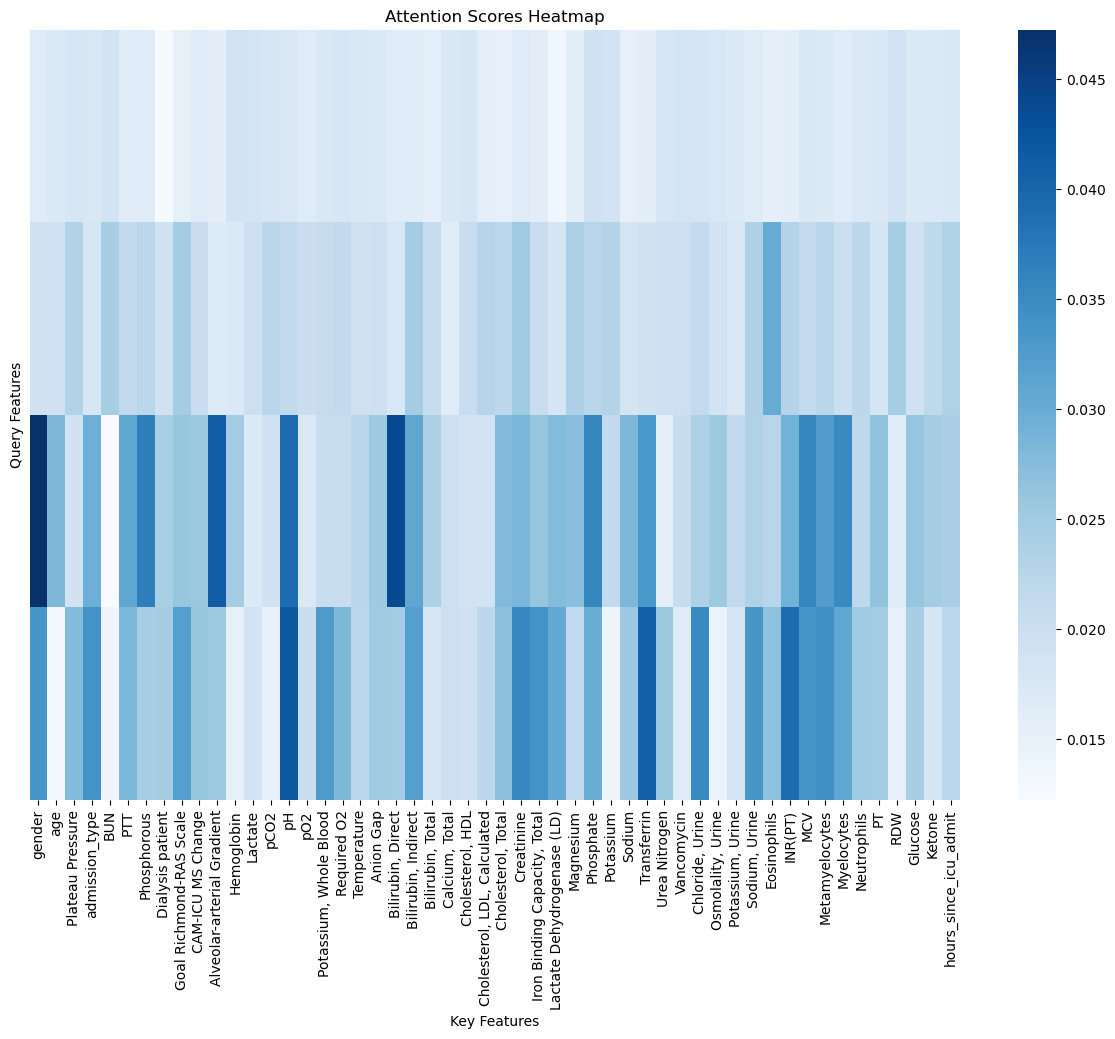

In [102]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
risk = ['gender', 'age', 'Plateau Pressure', 'admission_type', 'BUN', 'PTT', 'Phosphorous', 'Dialysis patient',
        'Goal Richmond-RAS Scale', 'CAM-ICU MS Change', 'Alveolar-arterial Gradient',
        'Hemoglobin', 'Lactate', 'pCO2', 'pH', 'pO2', 'Potassium, Whole Blood',
        'Required O2', 'Temperature', 'Anion Gap', 'Bilirubin, Direct', 'Bilirubin, Indirect',
        'Bilirubin, Total', 'Calcium, Total', 'Cholesterol, HDL', 'Cholesterol, LDL, Calculated',
        'Cholesterol, Total', 'Creatinine', 'Iron Binding Capacity, Total', 'Lactate Dehydrogenase (LD)',
        'Magnesium', 'Phosphate', 'Potassium', 'Sodium', 'Transferrin', 'Urea Nitrogen',
        'Vancomycin', 'Chloride, Urine', 'Osmolality, Urine', 'Potassium, Urine',
        'Sodium, Urine', 'Eosinophils', 'INR(PT)', 'MCV', 'Metamyelocytes', 'Myelocytes',
        'Neutrophils', 'PT', 'RDW', 'Glucose', 'Ketone', 'hours_since_icu_admit']

# Generate random input
sample_input = np.random.rand(1, 52, 52)

# Get attention layer and output
attention_layer = model.get_layer(name="multi_head_attention_9")  # Replace with correct attention layer name
attention_output = attention_layer(sample_input, sample_input, return_attention_scores=True)
attention_scores = attention_output[1]  # Extract attention scores

# Compute average attention score for each feature across the query and key
attention_means = np.mean(attention_scores[0], axis=(0, 1))  # Averaging over the attention score matrix

# Create a dictionary of feature names and their corresponding attention scores
feature_attention_dict = {risk[i]: attention_means[i] for i in range(48)}

# Sort the dictionary based on attention scores in descending order
sorted_features = sorted(feature_attention_dict.items(), key=lambda x: x[1], reverse=True)

# Print the ranked features
for rank, (feature, score) in enumerate(sorted_features, 1):
    print(f"Rank {rank}: {feature} with attention score {score:.4f}")

# Visualize attention scores as a heatmap
plt.figure(figsize=(15, 10))

# Use risk feature names for X-axis labels
sns.heatmap(attention_scores[0, :, :, 0], annot=False, cmap="Blues",
            xticklabels=risk, yticklabels=False)

plt.title("Attention Scores Heatmap")
plt.xlabel("Key Features")
plt.ylabel("Query Features")
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.show()


In [74]:
len(attention_means)

48

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No AKI', 'AKI'], yticklabels=['No AKI', 'AKI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Second Model


In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transformer Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transformer Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Assuming y_true are the true labels and y_scores are the predicted probabilities

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred)

# Calculate Precision-Recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve Transformer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % auprc)
plt.title('Precision-Recall Curve Transformer')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()